# Grafici dati presi le scorse volte

In [17]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")

/tmp/ipykernel_1369/611362656.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


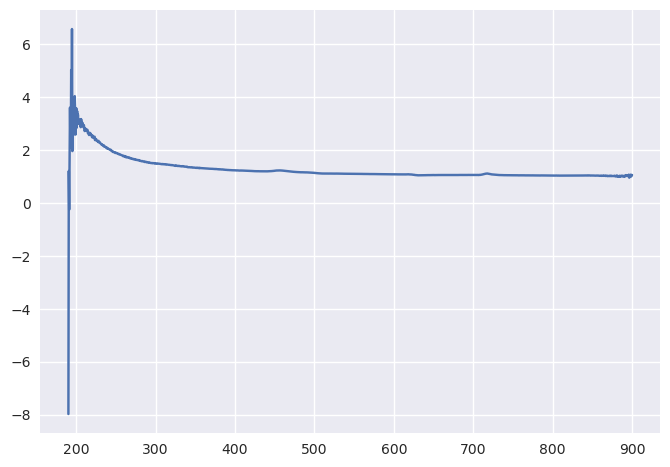

In [18]:
zeroair = np.loadtxt("data/trasm_900_190_zeroair_1.txt", skiprows=75)
plt.plot(zeroair[:,0], zeroair[:,1])

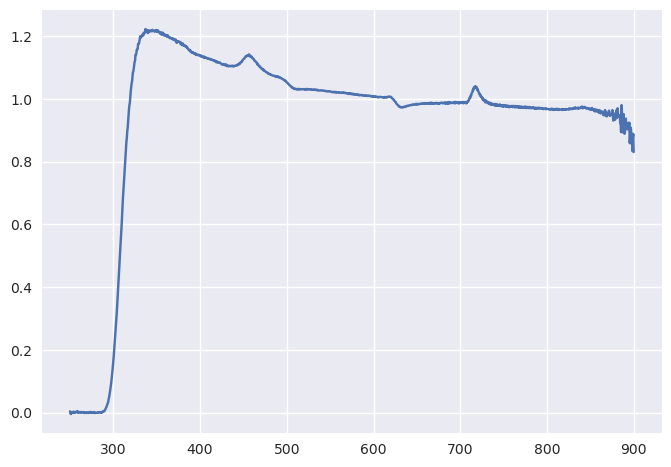

In [19]:
vetro_aria = np.loadtxt("data/trasm_900_250_vetro_1.txt", skiprows=75)
plt.plot(vetro_aria[:,0], vetro_aria[:,1])

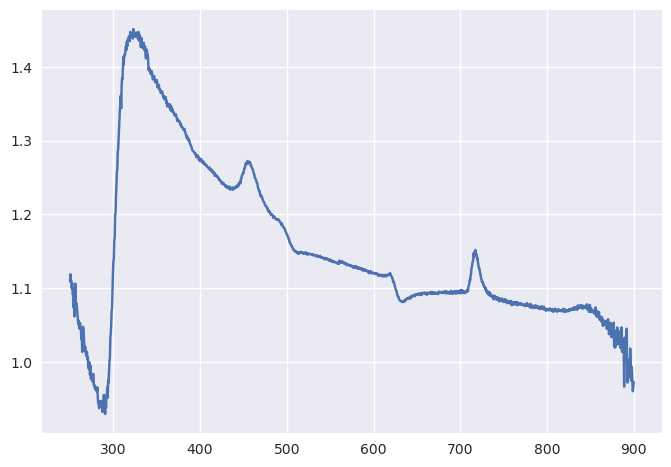

In [20]:
vetro_vetro = np.loadtxt("data/trasm_900_250_vetro_vetro_1.txt", skiprows=75)
plt.plot(vetro_vetro[:,0], vetro_vetro[:,1])

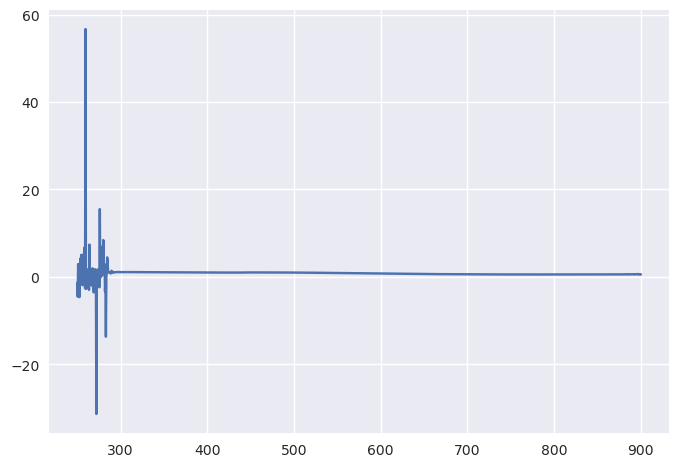

In [21]:
vetroAU_vetro = np.loadtxt("data/trasm_900_250_AuVetroSample_VetroRef.txt", skiprows=75)
plt.plot(vetroAU_vetro[:,0], vetroAU_vetro[:,1])

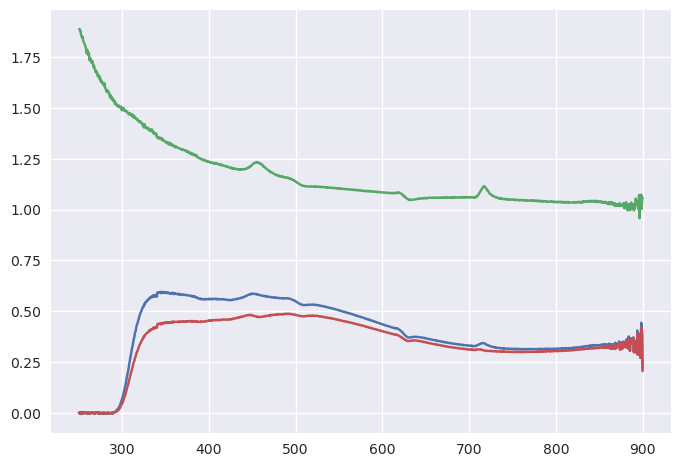

In [28]:
vetroAU_aria = np.loadtxt("data/trasm_900_250_AuVetroSample_AriaRef.txt", skiprows=75)
plt.plot(vetroAU_aria[:,0], vetroAU_aria[:,1])
plt.plot(zeroair[:1300, 0], zeroair[:1300, 1] )
plt.plot(vetroAU_aria[:,0], vetroAU_aria[:,1] / zeroair[:1301, 1])